<a href="https://colab.research.google.com/github/christian235711/Method_spad_test/blob/main/method_spad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# option d'affichage des résultats
pd.set_option("display.max_row",130)
pd.set_option("display.max_columns",100)

In [ ]:
# noms des variables de notre dataset y compris la variable identifiant IRIS
colonnes = ["IRIS","%C17_MENPSEUL","%C17_MENCOUPSENF","%C17_MENFAMMONO","%C17_PMEN_MENPSEUL","%P17_POP1524","%P17_POP2554","%P17_POP5579","%P17_POP80P","%P17_POP15P_PACSEE","%P17_POP15P_CONCUB_UNION_LIBRE","%P17_POP15P_VEUFS","%P17_POP15P_DIVORCEE","%P17_POP15P_CELIBATAIRE","%C17_MEN_CS1","%C17_MEN_CS2","%C17_MEN_CS3","%C17_MEN_CS4","%C17_MEN_CS5","%C17_MEN_CS6","%C17_MEN_CS7","%C17_MEN_CS8","%C17_NE24F0","%C17_NE24F4P","%P17_ACT1564","%P17_ACT1524","%P17_CHOM1564","%P17_CHOM1524","%P17_ETUD1564","%P17_AINACT1564","%P17_SAL15P","%P17_NSAL15P","%P17_SAL15P_CDI","%P17_SAL15P_EMPAID","%P17_NSAL15P_INDEP","%P17_ACTOCC15P_ILT1","%P17_ACTOCC15P_ILT2P","%C17_ACTOCC15P_VOIT","%C17_ACTOCC15P_TCOM","%P17_POP0205","%P17_SCOL0205","%P17_NSCOL15P_DIPLMIN","%P17_NSCOL15P_CAPBEP","%P17_NSCOL15P_BAC","%P17_NSCOL15P_SUP5","%P16_RP","%P16_RSECOCC","%P16_MAISON","%P16_APPART","%P16_RP_5P","%P16_RP_120P","%P16_RP_ACH19","%P16_RP_ACH45","%P16_RP_ACH70","%P16_RP_ACH90","%P16_RP_ACH05","%P16_RP_ACH13","%P16_PMEN_ANEM0002","%P16_PMEN_ANEM0204","%P16_PMEN_ANEM0509","%P16_PMEN_ANEM10P","%P16RP_PROP","%P16RP_LOC","%P16RP_LOCHLMV","%P16RP_CLIM","%P16RP_GARL","%P16RP_VOIT1","%P16RP_VOIT2P","%P16_POP_ETR","%P16_POP_IMM"]

In [ ]:
# importation du fichier (changer le chemin d'accès)
''' Faites attention au type de fichier, au délimiteur des valeurs (ça doit être unique et non multiple),
au header et à la lecture des types d'objets (low_memory) '''

data_orig = pd.read_csv("C:/Users/Christian/Desktop/input_texte.txt",delim_whitespace="\t" , header = None, names=colonnes, low_memory=False, )#, dtype='Int64')

In [ ]:
''' copie superficielle (peu profonde) du dataset original pour ne pas modifier les valeurs
d'origine par erreur plus tard 
'''
data = data_orig.copy()
data.shape

(48043, 70)

In [ ]:
# visualisation des premiers lignes
data.head()

,IRIS,%C17_MENPSEUL,%C17_MENCOUPSENF,%C17_MENFAMMONO,%C17_PMEN_MENPSEUL,%P17_POP1524,%P17_POP2554,%P17_POP5579,%P17_POP80P,%P17_POP15P_PACSEE,%P17_POP15P_CONCUB_UNION_LIBRE,%P17_POP15P_VEUFS,%P17_POP15P_DIVORCEE,%P17_POP15P_CELIBATAIRE,%C17_MEN_CS1,%C17_MEN_CS2,%C17_MEN_CS3,%C17_MEN_CS4,%C17_MEN_CS5,%C17_MEN_CS6,%C17_MEN_CS7,%C17_MEN_CS8,%C17_NE24F0,%C17_NE24F4P,%P17_ACT1564,%P17_ACT1524,%P17_CHOM1564,%P17_CHOM1524,%P17_ETUD1564,%P17_AINACT1564,%P17_SAL15P,%P17_NSAL15P,%P17_SAL15P_CDI,%P17_SAL15P_EMPAID,%P17_NSAL15P_INDEP,%P17_ACTOCC15P_ILT1,%P17_ACTOCC15P_ILT2P,%C17_ACTOCC15P_VOIT,%C17_ACTOCC15P_TCOM,%P17_POP0205,%P17_SCOL0205,%P17_NSCOL15P_DIPLMIN,%P17_NSCOL15P_CAPBEP,%P17_NSCOL15P_BAC,%P17_NSCOL15P_SUP5,%P16_RP,%P16_RSECOCC,%P16_MAISON,%P16_APPART,%P16_RP_5P,%P16_RP_120P,%P16_RP_ACH19,%P16_RP_ACH45,%P16_RP_ACH70,%P16_RP_ACH90,%P16_RP_ACH05,%P16_RP_ACH13,%P16_PMEN_ANEM0002,%P16_PMEN_ANEM0204,%P16_PMEN_ANEM0509,%P16_PMEN_ANEM10P,%P16RP_PROP,%P16RP_LOC,%P16RP_LOCHLMV,%P16RP_CLIM,%P16RP_GARL,%P16RP_VOIT1,%P16RP_VOIT2P,%P16_POP_ETR,%P16_POP_IMM
0,00000001011840000,35,30,4,35,10,49,35,3,7,15,6,7,20,0,5,7,11,27,11,32,4,47,2,77,35,7,11,8,6,44,7,38,0,5,15,82,91,0,3,83,20,33,18,4,69,23,95,4,53,27,34,7,8,29,14,6,8,15,15,60,79,17,3,0,86,44,48,0,1
1,00000002011850000,46,27,5,46,12,36,38,12,3,9,10,8,28,1,4,3,12,18,12,37,8,57,2,72,46,5,7,9,8,39,5,33,0,3,72,31,75,1,3,70,21,27,17,4,77,9,47,49,29,15,14,10,25,31,10,6,15,22,15,45,45,52,19,0,71,52,26,5,8
2,00000003011870000,35,37,14,35,7,39,45,8,3,11,6,8,21,3,11,8,14,16,8,37,1,67,0,76,45,5,7,4,7,37,13,31,0,8,40,68,90,0,4,82,15,31,18,8,47,43,78,19,57,33,51,5,8,16,13,5,11,17,19,52,73,21,5,0,77,48,44,7,8
3,00000004011880000,17,23,12,17,10,52,29,6,4,10,5,3,16,4,2,6,23,17,23,19,4,42,0,81,60,10,20,5,4,45,10,42,0,6,15,75,89,3,6,71,27,28,16,3,92,3,99,0,59,39,35,6,1,21,14,20,8,11,24,55,90,9,0,0,83,35,61,0,1
4,00000005011890000,26,26,9,26,11,55,28,3,6,15,3,4,21,0,0,8,24,17,30,13,5,42,1,81,56,6,11,5,7,57,4,51,0,2,12,81,91,2,5,69,14,34,19,6,82,6,79,19,49,24,14,11,24,21,15,12,11,25,15,48,64,33,8,0,86,33,61,6,8


In [ ]:

data2 = data
#for i in range(data2.shape[0]):
#  data2.iloc[i,0]= str(i+1).zfill(8)
data2  

,IRIS,%C17_MENPSEUL,%C17_MENCOUPSENF,%C17_MENFAMMONO,%C17_PMEN_MENPSEUL,%P17_POP1524,%P17_POP2554,%P17_POP5579,%P17_POP80P,%P17_POP15P_PACSEE,%P17_POP15P_CONCUB_UNION_LIBRE,%P17_POP15P_VEUFS,%P17_POP15P_DIVORCEE,%P17_POP15P_CELIBATAIRE,%C17_MEN_CS1,%C17_MEN_CS2,%C17_MEN_CS3,%C17_MEN_CS4,%C17_MEN_CS5,%C17_MEN_CS6,%C17_MEN_CS7,%C17_MEN_CS8,%C17_NE24F0,%C17_NE24F4P,%P17_ACT1564,%P17_ACT1524,%P17_CHOM1564,%P17_CHOM1524,%P17_ETUD1564,%P17_AINACT1564,%P17_SAL15P,%P17_NSAL15P,%P17_SAL15P_CDI,%P17_SAL15P_EMPAID,%P17_NSAL15P_INDEP,%P17_ACTOCC15P_ILT1,%P17_ACTOCC15P_ILT2P,%C17_ACTOCC15P_VOIT,%C17_ACTOCC15P_TCOM,%P17_POP0205,%P17_SCOL0205,%P17_NSCOL15P_DIPLMIN,%P17_NSCOL15P_CAPBEP,%P17_NSCOL15P_BAC,%P17_NSCOL15P_SUP5,%P16_RP,%P16_RSECOCC,%P16_MAISON,%P16_APPART,%P16_RP_5P,%P16_RP_120P,%P16_RP_ACH19,%P16_RP_ACH45,%P16_RP_ACH70,%P16_RP_ACH90,%P16_RP_ACH05,%P16_RP_ACH13,%P16_PMEN_ANEM0002,%P16_PMEN_ANEM0204,%P16_PMEN_ANEM0509,%P16_PMEN_ANEM10P,%P16RP_PROP,%P16RP_LOC,%P16RP_LOCHLMV,%P16RP_CLIM,%P16RP_GARL,%P16RP_VOIT1,%P16RP_VOIT2P,%P16_POP_ETR,%P16_POP_IMM
0,00000001011840000,35,30,4,35,10,49,35,3,7,15,6,7,20,0,5,7,11,27,11,32,4,47,2,77,35,7,11,8,6,44,7,38,0,5,15,82,91,0,3,83,20,33,18,4,69,23,95,4,53,27,34,7,8,29,14,6,8,15,15,60,79,17,3,0,86,44,48,0,1
1,00000002011850000,46,27,5,46,12,36,38,12,3,9,10,8,28,1,4,3,12,18,12,37,8,57,2,72,46,5,7,9,8,39,5,33,0,3,72,31,75,1,3,70,21,27,17,4,77,9,47,49,29,15,14,10,25,31,10,6,15,22,15,45,45,52,19,0,71,52,26,5,8
2,00000003011870000,35,37,14,35,7,39,45,8,3,11,6,8,21,3,11,8,14,16,8,37,1,67,0,76,45,5,7,4,7,37,13,31,0,8,40,68,90,0,4,82,15,31,18,8,47,43,78,19,57,33,51,5,8,16,13,5,11,17,19,52,73,21,5,0,77,48,44,7,8
3,00000004011880000,17,23,12,17,10,52,29,6,4,10,5,3,16,4,2,6,23,17,23,19,4,42,0,81,60,10,20,5,4,45,10,42,0,6,15,75,89,3,6,71,27,28,16,3,92,3,99,0,59,39,35,6,1,21,14,20,8,11,24,55,90,9,0,0,83,35,61,0,1
4,00000005011890000,26,26,9,26,11,55,28,3,6,15,3,4,21,0,0,8,24,17,30,13,5,42,1,81,56,6,11,5,7,57,4,51,0,2,12,81,91,2,5,69,14,34,19,6,82,6,79,19,49,24,14,11,24,21,15,12,11,25,15,48,64,33,8,0,86,33,61,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48038,00049220974240101,33,16,19,33,12,50,30,5,1,14,9,3,35,0,4,6,10,24,22,16,14,40,5,70,47,26,25,6,17,28,6,20,1,4,79,9,45,1,5,72,50,19,10,1,69,16,94,4,47,11,0,2,22,31,31,11,14,13,12,58,64,27,2,2,64,46,11,0,1
48039,00049221974240102,28,14,21,28,15,55,26,3,0,15,6,4,37,2,5,0,3,26,26,16,18,38,0,71,56,33,31,5,19,29,4,18,2,2,99,14,60,5,5,73,56,19,10,1,75,9,95,2,48,8,0,0,15,30,41,10,11,11,14,61,73,21,4,2,52,44,13,0,0
48040,00049222974240103,34,17,18,34,17,53,25,3,0,18,6,4,38,3,3,1,10,22,27,20,10,37,5,73,49,37,39,8,15,27,3,17,3,3,77,15,66,11,4,72,46,25,9,0,71,14,97,1,42,5,0,1,16,30,37,13,7,12,17,63,81,11,0,0,44,48,13,0,0
48041,00049223974240104,25,14,15,25,17,52,27,2,1,18,5,2,32,0,6,0,0,17,44,15,15,28,5,70,46,37,29,8,17,25,2,15,3,2,67,20,82,5,6,72,62,17,10,0,79,3,99,0,43,5,0,0,11,39,41,7,7,12,12,68,82,13,0,0,58,48,15,0,0


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48043 entries, 0 to 48042
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   IRIS                            48043 non-null  object
 1   %C17_MENPSEUL                   48043 non-null  int64 
 2   %C17_MENCOUPSENF                48043 non-null  int64 
 3   %C17_MENFAMMONO                 48043 non-null  int64 
 4   %C17_PMEN_MENPSEUL              48043 non-null  int64 
 5   %P17_POP1524                    48043 non-null  int64 
 6   %P17_POP2554                    48043 non-null  int64 
 7   %P17_POP5579                    48043 non-null  int64 
 8   %P17_POP80P                     48043 non-null  int64 
 9   %P17_POP15P_PACSEE              48043 non-null  int64 
 10  %P17_POP15P_CONCUB_UNION_LIBRE  48043 non-null  int64 
 11  %P17_POP15P_VEUFS               48043 non-null  int64 
 12  %P17_POP15P_DIVORCEE            48043 non-null

In [ ]:
data2.describe()

,%C17_MENPSEUL,%C17_MENCOUPSENF,%C17_MENFAMMONO,%C17_PMEN_MENPSEUL,%P17_POP1524,%P17_POP2554,%P17_POP5579,%P17_POP80P,%P17_POP15P_PACSEE,%P17_POP15P_CONCUB_UNION_LIBRE,%P17_POP15P_VEUFS,%P17_POP15P_DIVORCEE,%P17_POP15P_CELIBATAIRE,%C17_MEN_CS1,%C17_MEN_CS2,%C17_MEN_CS3,%C17_MEN_CS4,%C17_MEN_CS5,%C17_MEN_CS6,%C17_MEN_CS7,%C17_MEN_CS8,%C17_NE24F0,%C17_NE24F4P,%P17_ACT1564,%P17_ACT1524,%P17_CHOM1564,%P17_CHOM1524,%P17_ETUD1564,%P17_AINACT1564,%P17_SAL15P,%P17_NSAL15P,%P17_SAL15P_CDI,%P17_SAL15P_EMPAID,%P17_NSAL15P_INDEP,%P17_ACTOCC15P_ILT1,%P17_ACTOCC15P_ILT2P,%C17_ACTOCC15P_VOIT,%C17_ACTOCC15P_TCOM,%P17_POP0205,%P17_SCOL0205,%P17_NSCOL15P_DIPLMIN,%P17_NSCOL15P_CAPBEP,%P17_NSCOL15P_BAC,%P17_NSCOL15P_SUP5,%P16_RP,%P16_RSECOCC,%P16_MAISON,%P16_APPART,%P16_RP_5P,%P16_RP_120P,%P16_RP_ACH19,%P16_RP_ACH45,%P16_RP_ACH70,%P16_RP_ACH90,%P16_RP_ACH05,%P16_RP_ACH13,%P16_PMEN_ANEM0002,%P16_PMEN_ANEM0204,%P16_PMEN_ANEM0509,%P16_PMEN_ANEM10P,%P16RP_PROP,%P16RP_LOC,%P16RP_LOCHLMV,%P16RP_CLIM,%P16RP_GARL,%P16RP_VOIT1,%P16RP_VOIT2P,%P16_POP_ETR,%P16_POP_IMM
count,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000
mean,31.339633,29.048810,8.140249,31.339633,12.062278,45.318277,33.728722,6.921154,4.205254,11.652436,6.679225,5.328976,23.639427,2.762421,4.764274,8.477635,14.364361,14.911517,16.222821,31.009034,4.216743,50.988427,1.725121,74.460234,42.332827,8.764586,11.121641,8.454530,7.620632,41.346710,7.727390,34.993839,0.143330,4.454593,29.619632,71.426347,76.922882,8.460275,4.222904,74.185355,22.597111,26.839207,16.857565,7.297962,80.937452,9.724122,74.351831,23.877027,45.224632,21.555627,22.105489,9.175156,16.352913,25.414816,14.437920,9.637720,9.847678,16.453885,16.187665,55.558604,68.564099,27.950940,8.692296,0.396686,70.990717,43.195554,42.888891,5.307599,7.403722
std,11.230398,8.993539,5.784998,11.230398,5.261576,7.574313,7.889151,3.942014,2.633888,4.065741,3.164224,2.557826,8.334428,5.668966,4.638879,8.405171,7.441529,7.322677,9.384004,11.387354,5.730062,11.723375,3.024847,6.459557,13.157216,4.519130,7.844993,4.588326,5.125224,9.253958,4.603519,9.048420,0.460754,3.358961,20.909661,24.343659,19.412885,14.732810,1.779799,13.800656,8.947301,7.402738,3.640123,8.232063,14.394800,13.696239,32.006903,31.671598,18.992127,13.156693,18.458345,9.062675,14.083049,13.863468,9.671138,7.985752,5.667029,6.341756,4.581758,11.630671,20.923034,20.868008,16.732213,4.066052,18.701915,8.970391,17.143453,11.435280,11.746400
min,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,23.000000,5.000000,23.000000,9.000000,41.000000,29.000000,4.000000,2.000000,9.000000

In [ ]:
# visualisation des valeurs manquantes
#plt.figure(figsize=(20,10))
#sns.heatmap(data2.iloc[:,1:].isnull(), cbar=False)

In [ ]:
#vérification
data2.isnull().sum(axis=0)

IRIS                              0
%C17_MENPSEUL                     0
%C17_MENCOUPSENF                  0
%C17_MENFAMMONO                   0
%C17_PMEN_MENPSEUL                0
%P17_POP1524                      0
%P17_POP2554                      0
%P17_POP5579                      0
%P17_POP80P                       0
%P17_POP15P_PACSEE                0
%P17_POP15P_CONCUB_UNION_LIBRE    0
%P17_POP15P_VEUFS                 0
%P17_POP15P_DIVORCEE              0
%P17_POP15P_CELIBATAIRE           0
%C17_MEN_CS1                      0
%C17_MEN_CS2                      0
%C17_MEN_CS3                      0
%C17_MEN_CS4                      0
%C17_MEN_CS5                      0
%C17_MEN_CS6                      0
%C17_MEN_CS7                      0
%C17_MEN_CS8                      0
%C17_NE24F0                       0
%C17_NE24F4P                      0
%P17_ACT1564                      0
%P17_ACT1524                      0
%P17_CHOM1564                     0
%P17_CHOM1524               

In [ ]:
#nombre de modalités de chaque variables (dans un dataframe)
def nombre_mod(data2):
    #création d'un dataframe vide
    dff= pd.DataFrame(columns=["VARIABLE","NOMBRE_MOD"])
    for i in range(data2.shape[1]): # sans compter les valeurs manquantes
        taille =len(data2.iloc[:,i].value_counts(dropna=False))
        dff=dff.append({"VARIABLE": colonnes[i],"NOMBRE_MOD":taille }, ignore_index=True)
    return dff

In [ ]:
dff= nombre_mod(data2) 
dff

,VARIABLE,NOMBRE_MOD
0,IRIS,48043
1,%C17_MENPSEUL,96
2,%C17_MENCOUPSENF,78
3,%C17_MENFAMMONO,55
4,%C17_PMEN_MENPSEUL,96
5,%P17_POP1524,79
6,%P17_POP2554,76
7,%P17_POP5579,72
8,%P17_POP80P,42
9,%P17_POP15P_PACSEE,28


In [ ]:
#visualisation du dataframe par l'ordre
dff.sort_values(by="NOMBRE_MOD")

,VARIABLE,NOMBRE_MOD
33,%P17_SAL15P_EMPAID,11
39,%P17_POP0205,24
9,%P17_POP15P_PACSEE,28
12,%P17_POP15P_DIVORCEE,30
11,%P17_POP15P_VEUFS,39
34,%P17_NSAL15P_INDEP,39
8,%P17_POP80P,42
23,%C17_NE24F4P,42
26,%P17_CHOM1564,46
31,%P17_NSAL15P,47


In [ ]:
# description des modalités d'une variable
data2.iloc[:,14].value_counts(dropna=False)

0      28351
1       3420
2       2685
3       2174
4       1831
5       1459
6       1214
7        963
8        828
9        680
10       602
11       527
12       472
14       348
13       303
16       296
15       237
20       221
17       180
18       167
25       151
21       103
19        96
22        84
33        79
23        72
28        56
27        50
26        49
24        47
30        42
29        34
50        31
40        27
32        18
36        17
34        14
42        13
37        13
35        12
38        11
31        10
44         9
66         5
54         5
60         5
57         4
47         4
52         3
39         3
41         3
64         2
51         2
43         2
75         2
48         2
80         1
100        1
53         1
62         1
73         1
Name: %C17_MEN_CS1, dtype: int64

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
# remplissage des valeurs manquantes
#data_sans_nan = data2.fillna(999)

In [ ]:
# visualisation des valeurs manquantes
#plt.figure(figsize=(20,10))
#sns.heatmap( data_sans_nan.iloc[:,1:].isnull(), cbar =False)

In [ ]:
data_sans_nan = data2

In [ ]:
# transformation des valeurs float en int
data_sans_nan.iloc[:,1:] = data_sans_nan.iloc[:,1:].astype(int)
data_sans_nan

,IRIS,%C17_MENPSEUL,%C17_MENCOUPSENF,%C17_MENFAMMONO,%C17_PMEN_MENPSEUL,%P17_POP1524,%P17_POP2554,%P17_POP5579,%P17_POP80P,%P17_POP15P_PACSEE,%P17_POP15P_CONCUB_UNION_LIBRE,%P17_POP15P_VEUFS,%P17_POP15P_DIVORCEE,%P17_POP15P_CELIBATAIRE,%C17_MEN_CS1,%C17_MEN_CS2,%C17_MEN_CS3,%C17_MEN_CS4,%C17_MEN_CS5,%C17_MEN_CS6,%C17_MEN_CS7,%C17_MEN_CS8,%C17_NE24F0,%C17_NE24F4P,%P17_ACT1564,%P17_ACT1524,%P17_CHOM1564,%P17_CHOM1524,%P17_ETUD1564,%P17_AINACT1564,%P17_SAL15P,%P17_NSAL15P,%P17_SAL15P_CDI,%P17_SAL15P_EMPAID,%P17_NSAL15P_INDEP,%P17_ACTOCC15P_ILT1,%P17_ACTOCC15P_ILT2P,%C17_ACTOCC15P_VOIT,%C17_ACTOCC15P_TCOM,%P17_POP0205,%P17_SCOL0205,%P17_NSCOL15P_DIPLMIN,%P17_NSCOL15P_CAPBEP,%P17_NSCOL15P_BAC,%P17_NSCOL15P_SUP5,%P16_RP,%P16_RSECOCC,%P16_MAISON,%P16_APPART,%P16_RP_5P,%P16_RP_120P,%P16_RP_ACH19,%P16_RP_ACH45,%P16_RP_ACH70,%P16_RP_ACH90,%P16_RP_ACH05,%P16_RP_ACH13,%P16_PMEN_ANEM0002,%P16_PMEN_ANEM0204,%P16_PMEN_ANEM0509,%P16_PMEN_ANEM10P,%P16RP_PROP,%P16RP_LOC,%P16RP_LOCHLMV,%P16RP_CLIM,%P16RP_GARL,%P16RP_VOIT1,%P16RP_VOIT2P,%P16_POP_ETR,%P16_POP_IMM
0,00000001011840000,35,30,4,35,10,49,35,3,7,15,6,7,20,0,5,7,11,27,11,32,4,47,2,77,35,7,11,8,6,44,7,38,0,5,15,82,91,0,3,83,20,33,18,4,69,23,95,4,53,27,34,7,8,29,14,6,8,15,15,60,79,17,3,0,86,44,48,0,1
1,00000002011850000,46,27,5,46,12,36,38,12,3,9,10,8,28,1,4,3,12,18,12,37,8,57,2,72,46,5,7,9,8,39,5,33,0,3,72,31,75,1,3,70,21,27,17,4,77,9,47,49,29,15,14,10,25,31,10,6,15,22,15,45,45,52,19,0,71,52,26,5,8
2,00000003011870000,35,37,14,35,7,39,45,8,3,11,6,8,21,3,11,8,14,16,8,37,1,67,0,76,45,5,7,4,7,37,13,31,0,8,40,68,90,0,4,82,15,31,18,8,47,43,78,19,57,33,51,5,8,16,13,5,11,17,19,52,73,21,5,0,77,48,44,7,8
3,00000004011880000,17,23,12,17,10,52,29,6,4,10,5,3,16,4,2,6,23,17,23,19,4,42,0,81,60,10,20,5,4,45,10,42,0,6,15,75,89,3,6,71,27,28,16,3,92,3,99,0,59,39,35,6,1,21,14,20,8,11,24,55,90,9,0,0,83,35,61,0,1
4,00000005011890000,26,26,9,26,11,55,28,3,6,15,3,4,21,0,0,8,24,17,30,13,5,42,1,81,56,6,11,5,7,57,4,51,0,2,12,81,91,2,5,69,14,34,19,6,82,6,79,19,49,24,14,11,24,21,15,12,11,25,15,48,64,33,8,0,86,33,61,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48038,00049220974240101,33,16,19,33,12,50,30,5,1,14,9,3,35,0,4,6,10,24,22,16,14,40,5,70,47,26,25,6,17,28,6,20,1,4,79,9,45,1,5,72,50,19,10,1,69,16,94,4,47,11,0,2,22,31,31,11,14,13,12,58,64,27,2,2,64,46,11,0,1
48039,00049221974240102,28,14,21,28,15,55,26,3,0,15,6,4,37,2,5,0,3,26,26,16,18,38,0,71,56,33,31,5,19,29,4,18,2,2,99,14,60,5,5,73,56,19,10,1,75,9,95,2,48,8,0,0,15,30,41,10,11,11,14,61,73,21,4,2,52,44,13,0,0
48040,00049222974240103,34,17,18,34,17,53,25,3,0,18,6,4,38,3,3,1,10,22,27,20,10,37,5,73,49,37,39,8,15,27,3,17,3,3,77,15,66,11,4,72,46,25,9,0,71,14,97,1,42,5,0,1,16,30,37,13,7,12,17,63,81,11,0,0,44,48,13,0,0
48041,00049223974240104,25,14,15,25,17,52,27,2,1,18,5,2,32,0,6,0,0,17,44,15,15,28,5,70,46,37,29,8,17,25,2,15,3,2,67,20,82,5,6,72,62,17,10,0,79,3,99,0,43,5,0,0,11,39,41,7,7,12,12,68,82,13,0,0,58,48,15,0,0


In [ ]:
# discrétisation des variables continues (les valeurs manquantes doivent être gérées en amont)
''' c'est qui est bien avec KBinsDiscretizer est qu'il s'adapte aux éventuelles partitions au
sein d'une variable. En d'autres termes, si la méthode n'arrive pas à partitionner les individus
en k partitions, alors elle esssayera de les partitionner en k-1 partitions, et ainsi de suite, 
jusqu'à atteindre 1 partition (il faut faire attention avec les variables ayant uniquement 
une modalité). Lorsque la méthode rencontre ce cas, elle affichera "UserWaring" pour informer 
l'utilisateur de celui-ci ainsi que les variables concernées. Ceci sera utile plus tard.
'''
method_discre = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile') 
method_discre.fit(data_sans_nan.iloc[:,1:])
resultat_discre = method_discre.transform(data_sans_nan.iloc[:,1:])
resultat_discre

C:\Users\Christian\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 13 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
C:\Users\Christian\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 20 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
C:\Users\Christian\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 22 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
C:\Users\Christian\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feat

array([[2., 2., 0., ..., 2., 0., 1.],
       [3., 1., 1., ..., 0., 2., 3.],
       [2., 3., 3., ..., 1., 3., 3.],
       ...,
       [2., 0., 3., ..., 0., 0., 0.],
       [1., 0., 3., ..., 0., 0., 0.],
       [1., 0., 3., ..., 0., 0., 0.]])

In [ ]:
# construction du data frame après discrétisation
data2_index = data2.iloc[:,0:1]
df_resultat_discre = pd.DataFrame(resultat_discre,columns=colonnes[1:], dtype=int )
data_final = pd.concat([data2_index, df_resultat_discre], axis=1 ) #data2_index
data_final

,IRIS,%C17_MENPSEUL,%C17_MENCOUPSENF,%C17_MENFAMMONO,%C17_PMEN_MENPSEUL,%P17_POP1524,%P17_POP2554,%P17_POP5579,%P17_POP80P,%P17_POP15P_PACSEE,%P17_POP15P_CONCUB_UNION_LIBRE,%P17_POP15P_VEUFS,%P17_POP15P_DIVORCEE,%P17_POP15P_CELIBATAIRE,%C17_MEN_CS1,%C17_MEN_CS2,%C17_MEN_CS3,%C17_MEN_CS4,%C17_MEN_CS5,%C17_MEN_CS6,%C17_MEN_CS7,%C17_MEN_CS8,%C17_NE24F0,%C17_NE24F4P,%P17_ACT1564,%P17_ACT1524,%P17_CHOM1564,%P17_CHOM1524,%P17_ETUD1564,%P17_AINACT1564,%P17_SAL15P,%P17_NSAL15P,%P17_SAL15P_CDI,%P17_SAL15P_EMPAID,%P17_NSAL15P_INDEP,%P17_ACTOCC15P_ILT1,%P17_ACTOCC15P_ILT2P,%C17_ACTOCC15P_VOIT,%C17_ACTOCC15P_TCOM,%P17_POP0205,%P17_SCOL0205,%P17_NSCOL15P_DIPLMIN,%P17_NSCOL15P_CAPBEP,%P17_NSCOL15P_BAC,%P17_NSCOL15P_SUP5,%P16_RP,%P16_RSECOCC,%P16_MAISON,%P16_APPART,%P16_RP_5P,%P16_RP_120P,%P16_RP_ACH19,%P16_RP_ACH45,%P16_RP_ACH70,%P16_RP_ACH90,%P16_RP_ACH05,%P16_RP_ACH13,%P16_PMEN_ANEM0002,%P16_PMEN_ANEM0204,%P16_PMEN_ANEM0509,%P16_PMEN_ANEM10P,%P16RP_PROP,%P16RP_LOC,%P16RP_LOCHLMV,%P16RP_CLIM,%P16RP_GARL,%P16RP_VOIT1,%P16RP_VOIT2P,%P16_POP_ETR,%P16_POP_IMM
0,00000001011840000,2,2,0,2,1,2,2,0,3,3,2,3,1,0,2,2,1,3,1,2,1,1,2,2,1,1,2,2,2,2,2,2,0,2,1,2,3,0,1,3,1,3,2,1,0,3,2,1,2,2,3,2,1,2,2,1,1,1,1,2,2,1,1,0,3,2,2,0,1
1,00000002011850000,3,1,1,3,2,0,2,3,1,1,3,3,3,0,2,1,1,2,1,2,2,2,2,1,2,0,1,2,2,1,1,1,0,1,3,0,1,0,1,1,1,1,2,1,1,2,0,3,0,1,1,2,3,2,1,1,3,3,1,0,0,3,2,0,1,3,0,2,3
2,00000003011870000,2,3,3,2,0,0,3,2,1,2,2,3,2,1,3,2,2,2,0,2,0,3,0,2,2,0,1,0,2,1,3,1,0,3,3,1,3,0,2,3,0,2,2,3,0,3,1,2,2,3,3,1,1,1,2,1,2,2,3,1,1,2,1,0,2,2,1,3,3
3,00000004011880000,0,1,3,0,1,3,1,2,2,1,1,0,0,1,1,2,3,2,3,0,1,0,0,3,3,2,3,0,1,2,3,3,0,3,1,1,3,1,3,1,2,2,1,1,3,1,3,0,3,3,3,1,0,1,2,3,1,0,3,1,3,0,0,0,2,0,3,0,1
4,00000005011890000,1,1,2,1,2,3,0,0,3,3,0,1,2,0,0,2,3,2,3,0,1,0,1,3,3,1,2,0,2,3,0,3,0,1,0,2,3,1,3,1,0,3,3,2,1,2,1,2,2,2,1,2,3,1,2,2,2,3,1,0,1,2,1,0,3,0,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48038,00049220974240101,2,0,3,2,2,3,1,1,0,3,3,0,3,0,2,2,1,3,3,0,2,0,2,0,2,3,3,1,3,0,1,0,0,2,3,0,0,0,3,1,3,0,0,0,0,3,2,1,1,1,0,0,3,2,3,2,3,1,0,2,1,2,1,0,1,2,0,0,1
48039,00049221974240102,1,0,3,1,3,3,0,0,0,3,2,1,3,0,2,0,0,3,3,0,2,0,0,0,3,3,3,0,3,0,0,0,0,1,3,0,0,1,3,1,3,0,0,0,1,2,2,1,1,0,0,0,2,2,3,2,2,0,1,2,1,2,1,0,0,2,0,0,0
48040,00049222974240103,2,0,3,2,3,3,0,0,0,3,2,1,3,1,1,0,1,3,3,0,2,0,2,1,2,3,3,2,3,0,0,0,0,1,3,0,0,2,2,1,3,1,0,0,0,3,3,1,1,0,0,0,2,2,3,2,1,1,2,3,2,0,0,0,0,2,0,0,0
48041,00049223974240104,1,0,3,1,3,3,0,0,0,3,1,0,3,0,3,0,0,2,3,0,2,0,2,0,2,3,3,2,3,0,0,0,0,1,3,0,1,1,3,1,3,0,0,0,1,1,3,0,1,0,0,0,1,3,3,1,1,1,0,3,2,1,0,0,0,2,0,0,0


In [ ]:
# description des modalités d'une variable
for k in range(1,data_final.shape[1]):
    print(data_final.iloc[:,k].value_counts(dropna=True)); print("="*50)

3    12997
2    12737
1    12101
0    10208
Name: %C17_MENPSEUL, dtype: int64
1    12760
3    12554
2    11602
0    11127
Name: %C17_MENCOUPSENF, dtype: int64
3    12907
1    11926
0    11725
2    11485
Name: %C17_MENFAMMONO, dtype: int64
3    12997
2    12737
1    12101
0    10208
Name: %C17_PMEN_MENPSEUL, dtype: int64
2    16081
3    13219
1     9735
0     9008
Name: %P17_POP1524, dtype: int64
3    13863
0    11881
1    11858
2    10441
Name: %P17_POP2554, dtype: int64
1    12410
3    12173
2    11937
0    11523
Name: %P17_POP5579, dtype: int64
2    14838
3    13441
1    11524
0     8240
Name: %P17_POP80P, dtype: int64
2    14734
1    13562
3    12982
0     6765
Name: %P17_POP15P_PACSEE, dtype: int64
2    15299
3    13308
1     9885
0     9551
Name: %P17_POP15P_CONCUB_UNION_LIBRE, dtype: int64
3    15754
2    13277
0    11738
1     7274
Name: %P17_POP15P_VEUFS, dtype: int64
2    15368
3    12988
0    11084
1     8603
Name: %P17_POP15P_DIVORCEE, dtype: int64
2    14966
3    12068
1   

In [ ]:
# nombre de madalité par variable
nombre_mod(data_final)

,VARIABLE,NOMBRE_MOD
0,IRIS,48043
1,%C17_MENPSEUL,4
2,%C17_MENCOUPSENF,4
3,%C17_MENFAMMONO,4
4,%C17_PMEN_MENPSEUL,4
5,%P17_POP1524,4
6,%P17_POP2554,4
7,%P17_POP5579,4
8,%P17_POP80P,4
9,%P17_POP15P_PACSEE,4


In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48043 entries, 0 to 48042
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   IRIS                            48043 non-null  object
 1   %C17_MENPSEUL                   48043 non-null  int32 
 2   %C17_MENCOUPSENF                48043 non-null  int32 
 3   %C17_MENFAMMONO                 48043 non-null  int32 
 4   %C17_PMEN_MENPSEUL              48043 non-null  int32 
 5   %P17_POP1524                    48043 non-null  int32 
 6   %P17_POP2554                    48043 non-null  int32 
 7   %P17_POP5579                    48043 non-null  int32 
 8   %P17_POP80P                     48043 non-null  int32 
 9   %P17_POP15P_PACSEE              48043 non-null  int32 
 10  %P17_POP15P_CONCUB_UNION_LIBRE  48043 non-null  int32 
 11  %P17_POP15P_VEUFS               48043 non-null  int32 
 12  %P17_POP15P_DIVORCEE            48043 non-null

In [ ]:
# on test ca
#data_final.iloc[:,1:] = data_final.iloc[:,1:]+1
#data_final



In [ ]:
# on test ca aussi
#data_test = pd.concat([data2_index, data_final.iloc[:,33], data_final.iloc[:,33], data_final.iloc[:,33]], axis=1)



In [ ]:
#nombre de madalités inférieur à un certain seuil
nombre_mod(data_final)[  nombre_mod(data_final)["NOMBRE_MOD"]<4 ]


,VARIABLE,NOMBRE_MOD
14,%C17_MEN_CS1,2
21,%C17_MEN_CS8,3
23,%C17_NE24F4P,3
33,%P17_SAL15P_EMPAID,1
38,%C17_ACTOCC15P_TCOM,3
63,%P16RP_LOCHLMV,3
64,%P16RP_CLIM,1


In [ ]:
#élimination des variables qui n'ont qu'une seule modalité
''' quand on utilise certains packages pour faire l'acm, les méthodes n'acceptent pas
    des variables ayant une seule mdalité car c'est impossible de faire une division où
    le dénominateur (l'inértie totale) est égale à zéro '''
data_sans_deux_mod = data_final 
data_sans_deux_mod =data_sans_deux_mod.drop("%P17_SAL15P_EMPAID", 1, inplace = False)
data_sans_deux_mod=data_sans_deux_mod.drop("%P16RP_CLIM",1, inplace =False)
data_sans_deux_mod

,IRIS,%C17_MENPSEUL,%C17_MENCOUPSENF,%C17_MENFAMMONO,%C17_PMEN_MENPSEUL,%P17_POP1524,%P17_POP2554,%P17_POP5579,%P17_POP80P,%P17_POP15P_PACSEE,%P17_POP15P_CONCUB_UNION_LIBRE,%P17_POP15P_VEUFS,%P17_POP15P_DIVORCEE,%P17_POP15P_CELIBATAIRE,%C17_MEN_CS1,%C17_MEN_CS2,%C17_MEN_CS3,%C17_MEN_CS4,%C17_MEN_CS5,%C17_MEN_CS6,%C17_MEN_CS7,%C17_MEN_CS8,%C17_NE24F0,%C17_NE24F4P,%P17_ACT1564,%P17_ACT1524,%P17_CHOM1564,%P17_CHOM1524,%P17_ETUD1564,%P17_AINACT1564,%P17_SAL15P,%P17_NSAL15P,%P17_SAL15P_CDI,%P17_NSAL15P_INDEP,%P17_ACTOCC15P_ILT1,%P17_ACTOCC15P_ILT2P,%C17_ACTOCC15P_VOIT,%C17_ACTOCC15P_TCOM,%P17_POP0205,%P17_SCOL0205,%P17_NSCOL15P_DIPLMIN,%P17_NSCOL15P_CAPBEP,%P17_NSCOL15P_BAC,%P17_NSCOL15P_SUP5,%P16_RP,%P16_RSECOCC,%P16_MAISON,%P16_APPART,%P16_RP_5P,%P16_RP_120P,%P16_RP_ACH19,%P16_RP_ACH45,%P16_RP_ACH70,%P16_RP_ACH90,%P16_RP_ACH05,%P16_RP_ACH13,%P16_PMEN_ANEM0002,%P16_PMEN_ANEM0204,%P16_PMEN_ANEM0509,%P16_PMEN_ANEM10P,%P16RP_PROP,%P16RP_LOC,%P16RP_LOCHLMV,%P16RP_GARL,%P16RP_VOIT1,%P16RP_VOIT2P,%P16_POP_ETR,%P16_POP_IMM
0,00000001011840000,2,2,0,2,1,2,2,0,3,3,2,3,1,0,2,2,1,3,1,2,1,1,2,2,1,1,2,2,2,2,2,2,2,1,2,3,0,1,3,1,3,2,1,0,3,2,1,2,2,3,2,1,2,2,1,1,1,1,2,2,1,1,3,2,2,0,1
1,00000002011850000,3,1,1,3,2,0,2,3,1,1,3,3,3,0,2,1,1,2,1,2,2,2,2,1,2,0,1,2,2,1,1,1,1,3,0,1,0,1,1,1,1,2,1,1,2,0,3,0,1,1,2,3,2,1,1,3,3,1,0,0,3,2,1,3,0,2,3
2,00000003011870000,2,3,3,2,0,0,3,2,1,2,2,3,2,1,3,2,2,2,0,2,0,3,0,2,2,0,1,0,2,1,3,1,3,3,1,3,0,2,3,0,2,2,3,0,3,1,2,2,3,3,1,1,1,2,1,2,2,3,1,1,2,1,2,2,1,3,3
3,00000004011880000,0,1,3,0,1,3,1,2,2,1,1,0,0,1,1,2,3,2,3,0,1,0,0,3,3,2,3,0,1,2,3,3,3,1,1,3,1,3,1,2,2,1,1,3,1,3,0,3,3,3,1,0,1,2,3,1,0,3,1,3,0,0,2,0,3,0,1
4,00000005011890000,1,1,2,1,2,3,0,0,3,3,0,1,2,0,0,2,3,2,3,0,1,0,1,3,3,1,2,0,2,3,0,3,1,0,2,3,1,3,1,0,3,3,2,1,2,1,2,2,2,1,2,3,1,2,2,2,3,1,0,1,2,1,3,0,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48038,00049220974240101,2,0,3,2,2,3,1,1,0,3,3,0,3,0,2,2,1,3,3,0,2,0,2,0,2,3,3,1,3,0,1,0,2,3,0,0,0,3,1,3,0,0,0,0,3,2,1,1,1,0,0,3,2,3,2,3,1,0,2,1,2,1,1,2,0,0,1
48039,00049221974240102,1,0,3,1,3,3,0,0,0,3,2,1,3,0,2,0,0,3,3,0,2,0,0,0,3,3,3,0,3,0,0,0,1,3,0,0,1,3,1,3,0,0,0,1,2,2,1,1,0,0,0,2,2,3,2,2,0,1,2,1,2,1,0,2,0,0,0
48040,00049222974240103,2,0,3,2,3,3,0,0,0,3,2,1,3,1,1,0,1,3,3,0,2,0,2,1,2,3,3,2,3,0,0,0,1,3,0,0,2,2,1,3,1,0,0,0,3,3,1,1,0,0,0,2,2,3,2,1,1,2,3,2,0,0,0,2,0,0,0
48041,00049223974240104,1,0,3,1,3,3,0,0,0,3,1,0,3,0,3,0,0,2,3,0,2,0,2,0,2,3,3,2,3,0,0,0,1,3,0,1,1,3,1,3,0,0,0,1,1,3,0,1,0,0,0,1,3,3,1,1,1,0,3,2,1,0,0,2,0,0,0


In [ ]:
# vérification du nombre de modalités après élimination de deux variables
nombre_mod(data_sans_deux_mod)

,VARIABLE,NOMBRE_MOD
0,IRIS,48043
1,%C17_MENPSEUL,4
2,%C17_MENCOUPSENF,4
3,%C17_MENFAMMONO,4
4,%C17_PMEN_MENPSEUL,4
5,%P17_POP1524,4
6,%P17_POP2554,4
7,%P17_POP5579,4
8,%P17_POP80P,4
9,%P17_POP15P_PACSEE,4


In [ ]:
# on test ca 
#data_test = pd.concat([data2_index, data_final.iloc[:,14], data_final.iloc[:,33], data_final.iloc[:,33]], axis=1)



In [ ]:
#nombre_mod(data_test)

In [ ]:
#data_sans_deux_mod.iloc[0:1000,1:]

In [ ]:
from fanalysis.mca import MCA
%matplotlib inline

'''
A l'aide du package fanalysis, on appliquera l'analyse en correspondance multiple à la française:
axes factoriels, valeurs propres, contributions et cos2 des variables, contributions et cos2
des individus, visualisation des individus, variables et ses modalités correspondantes.

'''


In [ ]:
X = data_sans_deux_mod.iloc[0:, 1:]#.to_numpy()


In [ ]:
# MCA
'''ça marche aussi bien avec un array qu'avec un dataframe. Je continue avec un dataframe 
    car c'est plus jolie mais avec une base de données plus grande, il faudra utiliser avec
    un array.
'''
my_mca = MCA(row_labels=data_sans_deux_mod["IRIS"], var_labels=data_sans_deux_mod.columns.values[1:], n_components=10)


In [ ]:
my_mca.fit(X)

MCA(n_components=10,
    row_labels=0        00000001011840000
1        00000002011850000
2        00000003011870000
3        00000004011880000
4        00000005011890000
               ...        
48038    00049220974240101
48039    00049221974240102
48040    00049222974240103
48041    00049223974240104
48042    00049224974240105
Name: IRIS, Length: 48043, dtype: object,
    var_labels=array(['%C17_MENPSEUL', '%C17_MENCOUPSENF', '%C17_MENFAMMONO',
       '%C17_PME...
       '%P16_RSECOCC', '%P16_MAISON', '%P16_APPART', '%P16_RP_5P',
       '%P16_RP_120P', '%P16_RP_ACH19', '%P16_RP_ACH45', '%P16_RP_ACH70',
       '%P16_RP_ACH90', '%P16_RP_ACH05', '%P16_RP_ACH13',
       '%P16_PMEN_ANEM0002', '%P16_PMEN_ANEM0204', '%P16_PMEN_ANEM0509',
       '%P16_PMEN_ANEM10P', '%P16RP_PROP', '%P16RP_LOC', '%P16RP_LOCHLMV',
       '%P16RP_GARL', '%P16RP_VOIT1', '%P16RP_VOIT2P', '%P16_POP_ETR',
       '%P16_POP_IMM'], dtype=object))

In [ ]:
print(my_mca.eig_) # /sum(my_mca.eig_)*100)

[[ 0.2714521   0.15678251  0.10718639  0.07302623  0.05557065  0.05089187
   0.04308048  0.03565035  0.03339131  0.03180857]
 [ 9.32681567  5.38688614  3.68281439  2.50910643  1.9093506   1.74859239
   1.48020114  1.22490956  1.14729118  1.09291   ]
 [ 9.32681567 14.7137018  18.39651619 20.90562262 22.81497322 24.56356561
  26.04376675 27.26867631 28.41596749 29.5088775 ]]


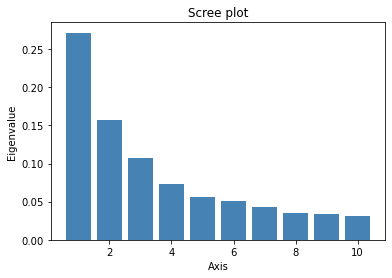

In [ ]:
my_mca.plot_eigenvalues()

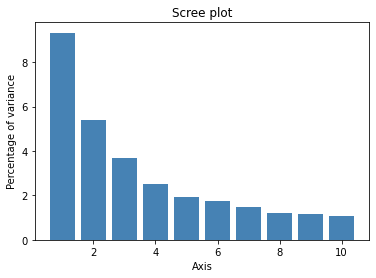

In [ ]:
my_mca.plot_eigenvalues(type="percentage")

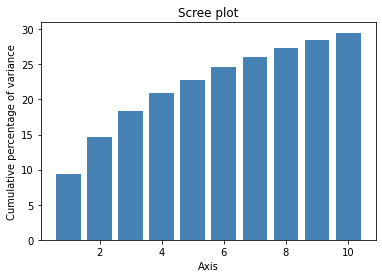

In [ ]:
my_mca.plot_eigenvalues(type="cumulative")

In [ ]:

df_rows = my_mca.row_topandas()
print( df_rows.iloc[0,0:10] )

row_coord_dim1     0.451576
row_coord_dim2    -0.037995
row_coord_dim3    -0.334580
row_coord_dim4    -0.053733
row_coord_dim5     0.096507
row_coord_dim6    -0.285603
row_coord_dim7     0.128272
row_coord_dim8    -0.358409
row_coord_dim9     0.004826
row_coord_dim10   -0.152253
Name: 00000001011840000, dtype: float64


In [ ]:
# Coordonnées des points lignes
print(my_mca.row_coord_)

[[ 0.45157649 -0.03799545 -0.33458018 ... -0.35840915  0.00482612
  -0.15225324]
 [-0.59621103  0.2023689  -0.3658026  ...  0.02639666 -0.16973511
   0.14203179]
 [ 0.23237714  0.42468111 -0.24134282 ... -0.07543953 -0.24143536
   0.16723533]
 ...
 [-0.38010746  0.20641407  0.25939709 ... -0.03993524  0.21213478
   0.02669939]
 [-0.33686811  0.08148178  0.32534309 ... -0.07548788  0.54788416
   0.04727613]
 [-0.26296565  0.18323252  0.65205936 ...  0.12544379  0.42892436
   0.06763684]]


In [ ]:
# Contributions des points lignes
print(my_mca.row_contrib_)

[[1.56364920e-03 1.91661803e-05 2.17385549e-03 ... 7.50005136e-03
  1.45188633e-06 1.51690633e-03]
 [2.72569147e-03 5.43700600e-04 2.59850650e-03 ... 4.06821540e-05
  1.79589020e-03 1.32006951e-03]
 [4.14060180e-04 2.39440804e-03 1.13109479e-03 ... 3.32279844e-04
  3.63360866e-03 1.83012915e-03]
 ...
 [1.10787167e-03 5.65654012e-04 1.30665347e-03 ... 9.31147682e-05
  2.80517631e-03 4.66475040e-05]
 [8.70154734e-04 8.81441083e-05 2.05548080e-03 ... 3.32705947e-04
  1.87117283e-02 1.46254613e-04]
 [5.30242716e-04 4.45735642e-04 8.25666196e-03 ... 9.18764860e-04
  1.14682681e-02 2.99358977e-04]]


In [ ]:

# Cos2 des points lignes
print(my_mca.row_cos2_)

[[7.08684738e-02 5.01711116e-04 3.89036958e-02 ... 4.46425115e-02
  8.09443671e-06 8.05607540e-03]
 [1.24029471e-01 1.42893479e-02 4.66894159e-02 ... 2.43121163e-04
  1.00523647e-02 7.03875748e-03]
 [1.91308535e-02 6.38959666e-02 2.06355628e-02 ... 2.01625523e-03
  2.06513903e-02 9.90840218e-03]
 ...
 [4.67032930e-02 1.37725171e-02 2.17502829e-02 ... 5.15522047e-04
  1.45464987e-02 2.30429175e-04]
 [3.67985238e-02 2.15293839e-03 3.43236743e-02 ... 1.84784315e-03
  9.73392677e-02 7.24760456e-04]
 [2.17664504e-02 1.05680453e-02 1.33833194e-01 ... 4.95322329e-03
  5.79096580e-02 1.43997912e-03]]


In [ ]:
df_cols = my_mca.col_topandas()
print(df_cols)

                    col_coord_dim1  col_coord_dim2  col_coord_dim3  \
%C17_MENPSEUL_0           0.594404       -0.845512        0.560304   
%C17_MENPSEUL_1           0.449997       -0.255168       -0.238514   
%C17_MENPSEUL_2           0.066731        0.418752       -0.424073   
%C17_MENPSEUL_3          -0.951223        0.491277        0.197591   
%C17_MENCOUPSENF_0       -1.242634       -0.122844        0.499051   
...                            ...             ...             ...   
%P16_POP_ETR_3           -1.031457        0.069539        0.309304   
%P16_POP_IMM_0            0.654407       -0.008528        0.576676   
%P16_POP_IMM_1            0.538106       -0.088227       -0.109207   
%P16_POP_IMM_2            0.078570        0.140252       -0.342304   
%P16_POP_IMM_3           -1.040701        0.008109        0.226413   

                    col_coord_dim4  col_coord_dim5  col_coord_dim6  \
%C17_MENPSEUL_0          -0.196678       -0.383216        0.465997   
%C17_MENPSEUL_1    

In [ ]:
# Coordonnées des points colonnes
print(my_mca.col_coord_)

[[ 0.59440439 -0.84551157  0.56030396 ...  0.09255602 -0.07509359
   0.48665328]
 [ 0.44999722 -0.25516789 -0.23851404 ... -0.51136318  0.46300465
  -0.43348584]
 [ 0.06673069  0.41875151 -0.42407263 ...  0.37178404 -0.41175435
   0.09859922]
 ...
 [ 0.53810561 -0.08822724 -0.10920698 ... -0.02720935  0.15441969
   0.00367305]
 [ 0.0785698   0.14025213 -0.34230449 ... -0.09193567 -0.30289634
   0.27927413]
 [-1.04070063  0.00810893  0.22641324 ... -0.13207459 -0.01071242
  -0.22762904]]


In [ ]:
# Contributions des points colonnes
print(my_mca.col_contrib_)

[[4.12768503e-01 1.44602982e+00 9.28845520e-01 ... 7.62046046e-02
  5.35559864e-02 2.36118944e+00]
 [2.80441831e-01 1.56124403e-01 1.99528342e-01 ... 2.75747389e+00
  2.41353485e+00 2.22086402e+00]
 [6.49113016e-03 4.42565332e-01 6.63900630e-01 ... 1.53419263e+00
  2.00911671e+00 1.20938621e-01]
 ...
 [6.14260994e-01 2.85903113e-02 6.40725818e-02 ... 1.19586887e-02
  4.11228292e-01 2.44242340e-04]
 [7.89586281e-03 4.35614947e-02 3.79548270e-01 ... 8.23162865e-02
  9.53972933e-01 8.51331457e-01]
 [1.67074890e+00 1.75623221e-04 2.00270393e-01 ... 2.04893169e-01
  1.43911172e-03 6.82124859e-01]]


In [ ]:
# Cos2 des points colonnes
print(my_mca.col_cos2_)

[[9.53259046e-02 1.92879485e-01 8.47021264e-02 ... 2.31129952e-03
  1.52143243e-03 6.38978470e-02]
 [6.81771242e-02 2.19215409e-02 1.91534457e-02 ... 8.80395720e-02
  7.21754864e-02 6.32657788e-02]
 [1.60646003e-03 6.32603222e-02 6.48782497e-02 ... 4.98654942e-02
  6.11638809e-02 3.50724115e-03]
 ...
 [1.81897196e-01 4.88985919e-03 7.49189580e-03 ... 4.65079564e-04
  1.49794654e-02 8.47510382e-06]
 [1.87137110e-03 5.96303694e-03 3.55200672e-02 ... 2.56222182e-03
  2.78122830e-02 2.36434045e-02]
 [4.22362461e-01 2.56425061e-05 1.99911287e-02 ... 6.80255772e-03
  4.47516342e-05 2.02064030e-02]]


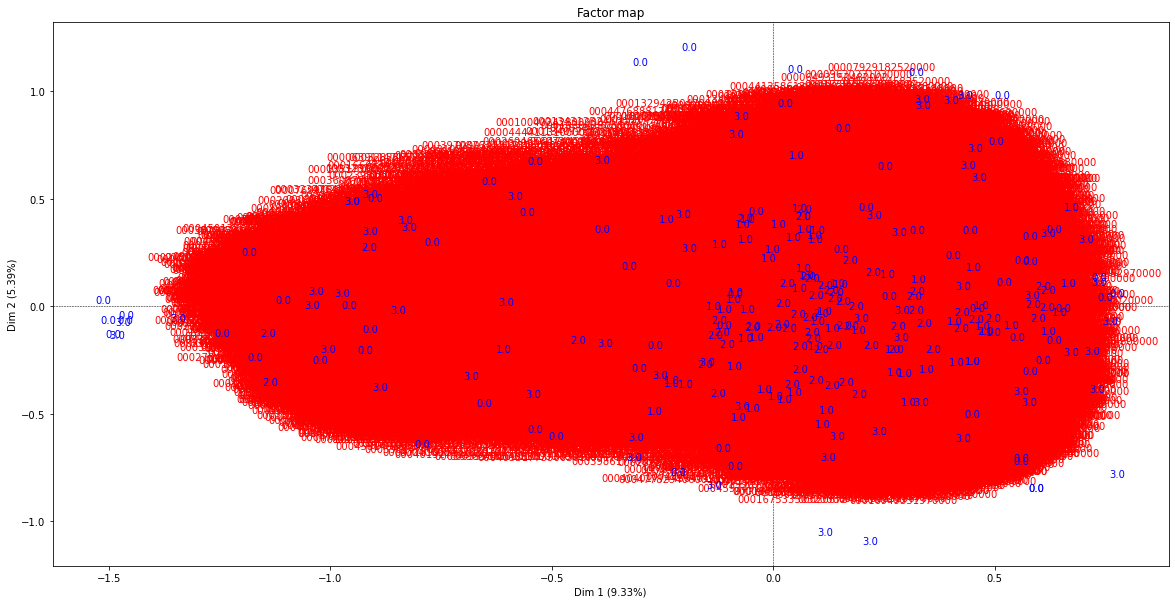

In [ ]:
# Mapping simultané des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_mca.mapping(num_x_axis=1, num_y_axis=2, figsize=(20,10))

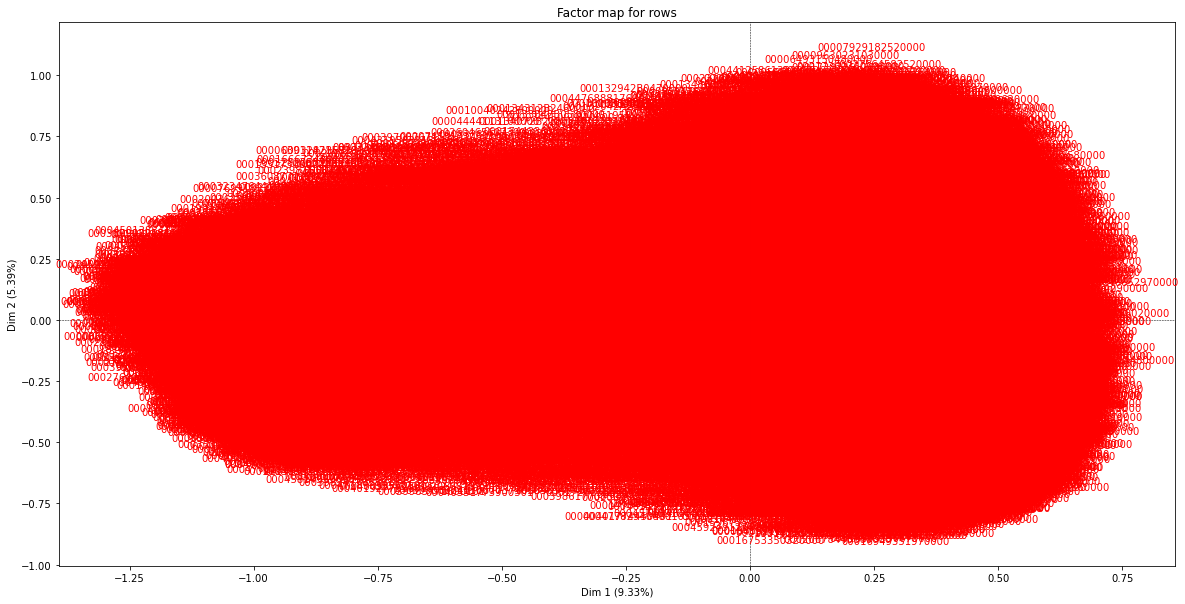

In [ ]:
# Mapping des points lignes
#my_mca.mapping_row(num_x_axis=1, num_y_axis=2, figsize=(20,10))

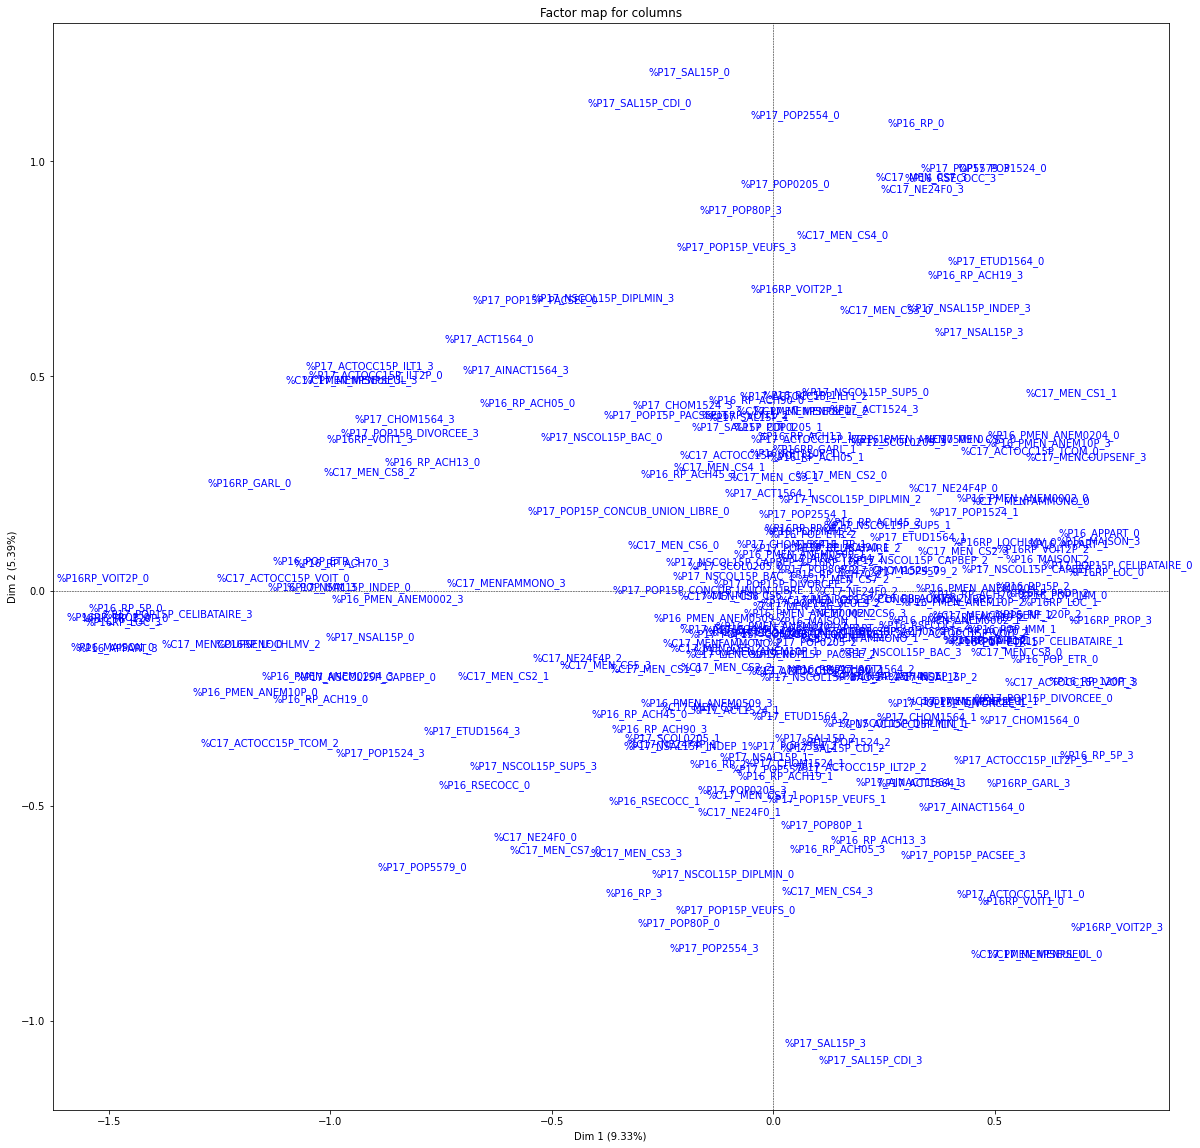

In [ ]:
# Mapping des points colonnes
my_mca.mapping_col(num_x_axis=1, num_y_axis=2,short_labels=False, figsize=(20,20))

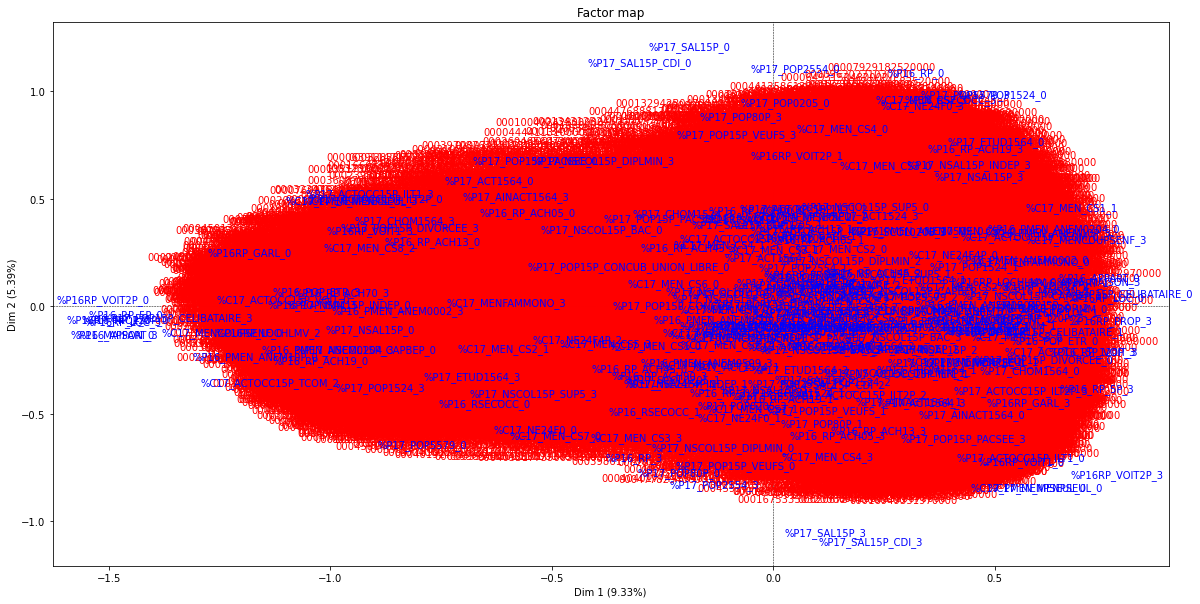

In [ ]:
my_mca.mapping(num_x_axis=1, num_y_axis=2, short_labels=False, figsize=(20, 10))

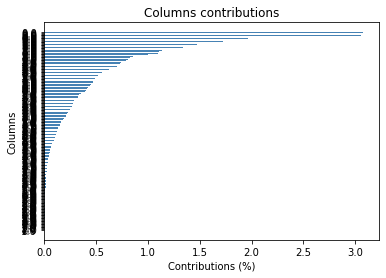

In [ ]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
my_mca.plot_col_contrib(num_axis=1)

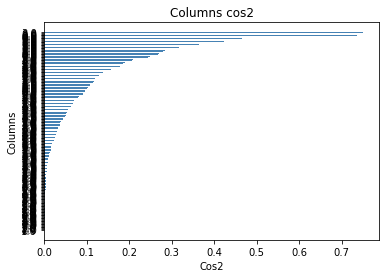

In [ ]:
# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
my_mca.plot_col_cos2(num_axis=1)

In [ ]:
X= my_mca.row_coord_
Data_init_cluster = pd.concat([data2_index, pd.DataFrame(X) ], axis=1)


In [ ]:
# Base de données qu'on obtient après l'ACM
Data_init_cluster


,IRIS,0,1,2,3,4,5,6,7,8,9
0,00000001011840000,0.451576,-0.037995,-0.334580,-0.053733,0.096507,-0.285603,0.128272,-0.358409,0.004826,-0.152253
1,00000002011850000,-0.596211,0.202369,-0.365803,0.222655,-0.174773,-0.356839,-0.575775,0.026397,-0.169735,0.142032
2,00000003011870000,0.232377,0.424681,-0.241343,0.384166,0.254352,0.209316,0.349923,-0.075440,-0.241435,0.167235
3,00000004011880000,0.459000,-0.334796,0.338630,-0.287378,0.176088,0.031932,-0.147908,0.012067,-0.464508,0.057907
4,00000005011890000,0.077617,-0.577255,-0.135926,0.016967,0.467049,0.204351,-0.170026,0.181829,0.112079,-0.267534
...,...,...,...,...,...,...,...,...,...,...,...
48038,00049220974240101,-0.317864,0.244659,-0.055501,-0.362188,0.279350,0.332866,-0.052760,0.037444,0.397565,0.115332
48039,00049221974240102,-0.388168,0.150541,0.173707,-0.524475,0.270541,0.256609,0.023109,-0.018641,0.632061,0.029144
48040,00049222974240103,-0.380107,0.206414,0.259397,-0.584336,0.127430,0.227819,0.103114,-0.039935,0.212135,0.026699
48041,00049223974240104,-0.336868,0.081482,0.325343,-0.652232,0.019270,0.226373,0.004453,-0.075488,0.547884,0.047276


In [ ]:
from sklearn.cluster import KMeans

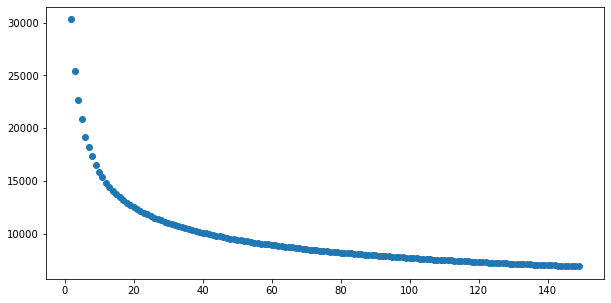

In [ ]:
# la courbe de l’inertie intra-classe en fonction de i (nombre de classes)
a=[]
for i in range(2,150):
    kmeans = KMeans(n_clusters=i) 
    kmeans.fit(Data_init_cluster.iloc[:,1:]) 
    a.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.scatter(range(2,150),a)

In [ ]:
'''
n_cluster = 8 : nombre de clusters finaux
algorithm= full : critère EM
n_init = 10 : nombre de partion
init='k-means++' :  choix des points de manière intelligente

'''
n_clusters_first=127
model = KMeans(n_clusters = n_clusters_first,init='k-means++', n_init=10, max_iter=300, tol = 0.01,algorithm ="full" )
print(model)

KMeans(algorithm='full', n_clusters=127, tol=0.01)


In [ ]:
#model.fit(X)
#new_labels_kmeans = model.predict(X)
#print(new_labels_kmeans)
#print(model.n_iter_)
#np.array(np.unique(new_labels_kmeans, return_counts=True)).T

In [ ]:
model.fit(Data_init_cluster.iloc[:,1:])
# les classes après kmeans
new_labels_kmeans = model.predict(Data_init_cluster.iloc[:,1:])
print(new_labels_kmeans)
print(model.n_iter_)
#np.array(np.unique(new_labels_kmeans, return_counts=True)).T

[56 57 45 ... 48 48 52]
49


In [ ]:
len(model.labels_)

48043

In [ ]:
#nombre d'individus dans chaque groupe
nb_after_kmeans = np.array(np.unique( model.predict(Data_init_cluster.iloc[:,1:]) , return_counts=True)).T
nb_after_kmeans

array([[  0, 551],
       [  1, 398],
       [  2, 251],
       [  3, 353],
       [  4, 358],
       [  5, 498],
       [  6, 514],
       [  7, 440],
       [  8, 436],
       [  9, 267],
       [ 10, 444],
       [ 11, 497],
       [ 12, 444],
       [ 13, 334],
       [ 14, 522],
       [ 15, 303],
       [ 16, 626],
       [ 17, 374],
       [ 18, 375],
       [ 19, 386],
       [ 20, 332],
       [ 21, 244],
       [ 22, 394],
       [ 23, 290],
       [ 24, 463],
       [ 25, 252],
       [ 26, 372],
       [ 27, 505],
       [ 28, 415],
       [ 29, 348],
       [ 30, 454],
       [ 31, 377],
       [ 32, 354],
       [ 33, 513],
       [ 34, 318],
       [ 35, 305],
       [ 36, 413],
       [ 37, 348],
       [ 38, 278],
       [ 39, 162],
       [ 40, 358],
       [ 41, 369],
       [ 42, 447],
       [ 43, 284],
       [ 44, 365],
       [ 45, 323],
       [ 46, 450],
       [ 47, 483],
       [ 48, 533],
       [ 49, 350],
       [ 50, 384],
       [ 51, 343],
       [ 52,

In [ ]:
# centre de gravité
model.cluster_centers_

array([[ 0.4641415 , -0.49726886,  0.29824889, ...,  0.1268296 ,
        -0.0563757 , -0.03655173],
       [ 0.28036063,  0.09547043,  0.24219139, ...,  0.02877792,
         0.04866996,  0.24554702],
       [-0.87349833, -0.31219786,  0.10233133, ..., -0.11514454,
        -0.31003129, -0.21117678],
       ...,
       [-0.74316929,  0.18636325, -0.03064981, ..., -0.00365177,
         0.16585832,  0.09721795],
       [ 0.20530978,  0.56787461, -0.06037138, ..., -0.14711899,
        -0.13366138,  0.01605309],
       [ 0.45853516, -0.35844083,  0.47571221, ...,  0.03012657,
        -0.09212176,  0.13000942]])

In [ ]:
#Dataframe contenant les classes de tous les individus
df_resultat_kmeans = pd.DataFrame(new_labels_kmeans ,columns=["class_kmeans"] )# , dtype=int )
#Dataframe contenant les identifiants et les classes de tous les individus 
ident_class_kmeans = pd.concat([data2_index, df_resultat_kmeans], axis=1 ) #data2_index
ident_class_kmeans


,IRIS,class_kmeans
0,00000001011840000,58
1,00000002011850000,36
2,00000003011870000,72
3,00000004011880000,126
4,00000005011890000,32
...,...,...
48038,00049220974240101,70
48039,00049221974240102,70
48040,00049222974240103,124
48041,00049223974240104,70


In [ ]:
#pondération du centre de gravité de chacun des clusters
Data_init_classi = model.cluster_centers_*(nb_after_kmeans[:,1].reshape(n_clusters_first,1))
Data_init_classi

array([[ 255.74196708, -273.99514363,  164.33513735, ...,   69.88311165,
         -31.06300844,  -20.14000419],
       [ 111.5835288 ,   37.99723116,   96.39217425, ...,   11.45361028,
          19.3706428 ,   97.72771222],
       [-219.24808036,  -78.36166279,   25.68516479, ...,  -28.90127853,
         -77.81785366,  -53.00537126],
       ...,
       [-204.37155486,   51.24989481,   -8.42869695, ...,   -1.00423779,
          45.61103775,   26.7349362 ],
       [  76.78585831,  212.38510541,  -22.57889769, ...,  -55.0225006 ,
         -49.98935456,    6.00385586],
       [ 187.54088184, -146.60229853,  194.566294  , ...,   12.32176878,
         -37.67780029,   53.1738532 ]])

In [ ]:
#Dataframe de la pondération du centre de gravité de chacun des clusters
Data_init_classi = pd.DataFrame(Data_init_classi)
Data_init_classi

,0,1,2,3,4,5,6,7,8,9
0,255.741967,-273.995144,164.335137,-110.715897,49.639187,28.350776,-176.810656,69.883112,-31.063008,-20.140004
1,111.583529,37.997231,96.392174,-57.020538,49.749707,-15.269773,66.156629,11.453610,19.370643,97.727712
2,-219.248080,-78.361663,25.685165,-32.203204,62.719266,-2.688289,-20.035319,-28.901279,-77.817854,-53.005371
3,137.751154,0.852585,-122.540582,37.154637,2.805229,-58.449410,39.533567,-110.986279,12.989493,38.939758
4,-352.060172,51.223846,10.849325,-90.766290,8.569103,-69.477825,-100.989451,-44.169903,-11.217283,37.923178
5,-437.313211,-48.237100,119.724996,237.855848,-26.837612,-190.395926,8.150122,42.931353,103.005809,39.813119
6,175.456265,306.693096,41.464720,-17.534562,55.957248,-8.110618,47.066459,49.284974,-50.442946,-24.210669
7,192.869221,182.319893,142.478773,43.212271,-4.645680,-18.193160,61.109283,-9.638687,-109.185106,-19.276417
8,224.445715,-26.473681,163.125664,36.009939,-84.574822,-31.526413,17.986087,-24.938586,-72.502253,105.357184
9,-94.205707,-20.847574,-117.463170,84.182214,-35.125055,-7.858258,13.895687,37.538724,-61.819663,15.561650


In [ ]:
# changement d'échelle si les valeurs sont trop petites
#Data_init_classi=Data_init_classi*10000

In [ ]:
#librairies pour la CAH
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


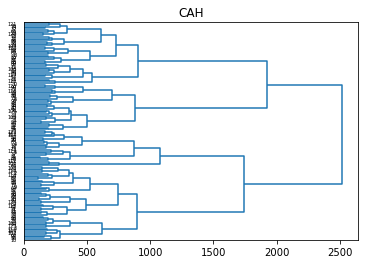

In [ ]:
#générer la matrice des liens
Z = linkage(Data_init_classi,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=Data_init_classi.index,orientation='right',color_threshold=1)
plt.show()


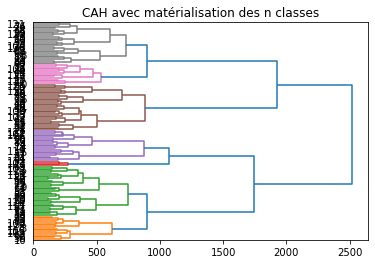

[6 5 2 1 4 4 5 5 7 2 1 7 6 4 6 2 5 4 6 7 4 2 5 2 7 2 2 3 5 7 7 4 7 5 2 1 4
 4 2 2 5 4 5 1 6 5 5 6 5 7 1 2 5 2 1 2 5 6 7 2 2 2 1 2 2 7 2 7 7 3 2 2 5 7
 7 5 7 2 4 5 6 7 7 4 4 7 2 2 7 5 5 5 1 5 5 1 4 6 5 7 1 3 1 2 7 1 5 4 6 5 1
 6 4 2 4 2 2 6 5 4 7 7 4 1 2 5 7]
[ 35  43 100 110  50  95  54 123  10 102  62  92 105   3  61  38  39  77
  71  51  66  53  64  55  34 103  59  60 113  63  70   2 115  21  86  15
  23 124  26  25   9  87 116 101  69  27 119 107  17   5   4  13 122 114
  20  31  96 112  84  41  83  37  78  36  89  72  98  75  79  91  90  94
 125   1   6   7  16 118  22  28  33 106  40  42  45  46  93  48  52  56
 109 117 108  97 111   0  47  12  80  14  18  57  44   8  11 121 120  19
  24  29  30  32  85  49  58  65  67  68 104  73  74  76  99  81  82  88
 126]
     0
1   35
1   43
1  100
1  110
1   50
1   95
1   54
1  123
1   10
1  102
1   62
1   92
1  105
1    3
2   61
2   38
2   39
2   77
2   71
2   51
2   66
2   53
2   64
2   55
2   34
2  103
2   59
2   60
2  113
2   63
2   70


In [ ]:
#matérialisation des n classes (hauteur t = 7)
plt.title('CAH avec matérialisation des n classes')
dendrogram(Z,labels=Data_init_classi.index,orientation='right',color_threshold=880,leaf_font_size=10)
plt.show()
#découpage à la hauteur t = 7 ==> identifiants de n groupes obtenus
groupes_cah = fcluster(Z,t=880,criterion='distance')
print(groupes_cah)
#index triés des groupes
idg = np.argsort(groupes_cah)
print(idg)
#affichage des observations et leurs groupes
print(pd.DataFrame(Data_init_classi.index[idg],groupes_cah[idg]))


In [ ]:
#Dataframe qui relie les classes obtenues du kmeans et celles de la cah
a = pd.DataFrame( Data_init_classi.index[idg], columns=["class_kmeans"])
b = pd.DataFrame( groupes_cah[idg], columns = ["class_cah"])
link_class_kmeans_cah = pd.concat([a, b], axis=1 ) 
link_class_kmeans_cah


,class_kmeans,class_cah
0,35,1
1,43,1
2,100,1
3,110,1
4,50,1
5,95,1
6,54,1
7,123,1
8,10,1
9,102,1


In [ ]:
# nombre de madalités du kmeans dans chacune de classes de la cah
link_class_kmeans_cah["class_cah"].value_counts()


2    29
5    27
7    24
4    18
1    14
6    12
3     3
Name: class_cah, dtype: int64

In [ ]:
# A REVOIR, INDEX
points_init=pd.DataFrame(model.cluster_centers_)
points_init

,0,1,2,3,4,5,6,7,8,9
0,0.464142,-0.497269,0.298249,-0.200936,0.090089,0.051453,-0.320890,0.126830,-0.056376,-0.036552
1,0.280361,0.095470,0.242191,-0.143268,0.124999,-0.038366,0.166223,0.028778,0.048670,0.245547
2,-0.873498,-0.312198,0.102331,-0.128300,0.249878,-0.010710,-0.079822,-0.115145,-0.310031,-0.211177
3,0.390230,0.002415,-0.347140,0.105254,0.007947,-0.165579,0.111993,-0.314409,0.036797,0.110311
4,-0.983408,0.143083,0.030305,-0.253537,0.023936,-0.194072,-0.282093,-0.123380,-0.031333,0.105931
5,-0.878139,-0.096862,0.240412,0.477622,-0.053891,-0.382321,0.016366,0.086208,0.206839,0.079946
6,0.341355,0.596679,0.080671,-0.034114,0.108866,-0.015779,0.091569,0.095885,-0.098138,-0.047102
7,0.438339,0.414363,0.323815,0.098210,-0.010558,-0.041348,0.138885,-0.021906,-0.248148,-0.043810
8,0.514784,-0.060719,0.374141,0.082592,-0.193979,-0.072308,0.041252,-0.057199,-0.166290,0.241645
9,-0.352830,-0.078081,-0.439937,0.315289,-0.131555,-0.029432,0.052044,0.140594,-0.231534,0.058283


In [ ]:
# les identifiants et les classes auxquelles ils appartient à la suite du kmeans et de la cah 
ident_class_kmeans_cah=ident_class_kmeans
ident_class_kmeans_cah=pd.merge(ident_class_kmeans_cah, link_class_kmeans_cah)
ident_class_kmeans_cah

,IRIS,class_kmeans,class_cah
0,00000001011840000,58,7
1,00000112012940000,58,7
2,00000137013230000,58,7
3,00000148013370000,58,7
4,00000161013520000,58,7
...,...,...,...
48038,00047536940180102,31,4
48039,00047537940180103,31,4
48040,00047919940800101,31,4
48041,00047923940800201,31,4


In [ ]:
#création des centres de gravité de chacune des classes obtenues à partir du cah
#ajouter manuellement la liste de liste par rapport au nombre de classes sollicité
#les centres de gravité ne sont pas pondérés 
#les groupes du cah sont numérotés à partir de 1 
points_init_kmeans_final=[[],[],[],[],[],[],[]]
for k in range(1,len(link_class_kmeans_cah.iloc[:,1].value_counts())+1):
    bbb=link_class_kmeans_cah[link_class_kmeans_cah["class_cah"] ==k]   
    for i in bbb["class_kmeans"]:
        points_init_kmeans_final[k-1].append(points_init[points_init.index ==i])
    points_init_kmeans_final[k-1] = np.mean(points_init_kmeans_final[k-1], axis=0).tolist()
#conversion de la liste d'array en array uniquement et suppression d'une dimension (car il en a 3)
points_init_kmeans_final=np.asarray(points_init_kmeans_final)[:,0,:]
points_init_kmeans_final

(7, 10)

In [ ]:
'''
n_cluster = 7 : nombre de clusters finaux
algorithm= full : critère EM
n_init = 1 : nombre de partion
init= np.array :  choix des points

'''
n_clusters_first=7
model_kmeans_final = KMeans(n_clusters = n_clusters_first,init=points_init_kmeans_final, n_init=1, max_iter=300, tol = 0.01,algorithm ="full" )
print(model_kmeans_final)

KMeans(algorithm='full',
       init=array([[ 1.39428322e-01, -7.47539124e-02, -4.49302693e-01,
         5.60077475e-02, -1.20258156e-01,  5.37782228e-03,
         1.10768402e-01,  5.13254623e-02,  3.71249454e-02,
         7.40175304e-02],
       [-4.03200691e-01, -2.67250799e-02, -1.41293651e-01,
         2.28498063e-02, -1.83221348e-02,  1.45823639e-01,
         3.96138907e-02,  4.11195453e-02, -2.13658345e-02,
        -4.15410635e-02],
       [...
        -2.75830392e-03],
       [ 3.69197491e-01, -5.45957444e-01,  1.19192871e-01,
         4.89832076e-02, -1.08026382e-01,  1.60101210e-01,
        -1.48664659e-01, -5.03923558e-03,  1.59764909e-02,
         4.21263575e-02],
       [ 4.07999032e-01, -1.90266306e-01,  5.88625221e-02,
        -9.16640473e-02,  2.68636039e-02, -1.04606311e-01,
        -1.91186148e-02, -2.06098509e-02,  2.25531685e-02,
        -1.71977325e-02]]),
       n_clusters=7, n_init=1, tol=0.01)


In [ ]:
model_kmeans_final.fit(Data_init_cluster.iloc[:,1:])
new_labels_kmeans_final= model_kmeans_final.predict(Data_init_cluster.iloc[:,1:])
print(new_labels_kmeans_final)
print(model_kmeans_final.n_iter_)

[6 1 4 ... 2 2 2]
11


In [ ]:
#Dataframe contenant les classes de tous les individus
df_resultat_kmeans_final = pd.DataFrame(new_labels_kmeans_final ,columns=["class_kmeans_final"] )# , dtype=int )
#Dataframe contenant les identifiants et les classes de tous les individus 
ident_class_kmeans_final = pd.concat([data2_index, df_resultat_kmeans_final], axis=1 ) #data2_index
ident_class_kmeans_final



,IRIS,class_kmeans_final
0,00000001011840000,6
1,00000002011850000,1
2,00000003011870000,4
3,00000004011880000,5
4,00000005011890000,5
...,...,...
48038,00049220974240101,1
48039,00049221974240102,2
48040,00049222974240103,2
48041,00049223974240104,2


In [ ]:
# les identifiants et les classes auxquelles ils appartient à la suite du kmeans,de la cah
# et du kmeans_final
ident_class_kmeans_cah_kmeans_final=pd.merge(ident_class_kmeans_cah,ident_class_kmeans_final)
ident_class_kmeans_cah_kmeans_final

,IRIS,class_kmeans,class_cah,class_kmeans_final
0,00000001011840000,58,7,6
1,00000112012940000,58,7,6
2,00000137013230000,58,7,6
3,00000148013370000,58,7,0
4,00000161013520000,58,7,6
...,...,...,...,...
48038,00047536940180102,31,4,3
48039,00047537940180103,31,4,3
48040,00047919940800101,31,4,3
48041,00047923940800201,31,4,3


In [ ]:
ident_class_kmeans_cah_kmeans_final["class_cah"].value_counts()

5    12080
7    10150
2     7672
4     6597
6     5218
1     4762
3     1564
Name: class_cah, dtype: int64

In [ ]:
ident_class_kmeans_cah_kmeans_final["class_kmeans_final"].value_counts()

6    10260
5     8381
4     7887
0     7384
3     5355
2     4737
1     4039
Name: class_kmeans_final, dtype: int64

In [ ]:
( (ident_class_kmeans_cah_kmeans_final["class_cah"]-(ident_class_kmeans_cah_kmeans_final["class_kmeans_final"]+1))!=0 ).sum()

18730

In [ ]:
# identfiants avec huit premiers caractères (Même référence, modifier après )
ident_huit_carac_class_kmeans_cah_kmeans_final = ident_class_kmeans_cah_kmeans_final
for i in range(ident_huit_carac_class_kmeans_cah_kmeans_final.shape[0]) :
    ident_huit_carac_class_kmeans_cah_kmeans_final.iloc[i,0] = ident_huit_carac_class_kmeans_cah_kmeans_final.iloc[i,0][0:8]
ident_huit_carac_class_kmeans_cah_kmeans_final

,IRIS,class_kmeans,class_cah,class_kmeans_final
0,00000001,58,7,6
1,00000112,58,7,6
2,00000137,58,7,6
3,00000148,58,7,0
4,00000161,58,7,6
...,...,...,...,...
48038,00047536,31,4,3
48039,00047537,31,4,3
48040,00047919,31,4,3
48041,00047923,31,4,3


In [ ]:
confusion_matrix(ident_huit_carac_class_kmeans_cah_kmeans_final["class_cah"],ident_huit_carac_class_kmeans_cah_kmeans_final["class_kmeans_final"]+1)

array([[3469,  503,    0,    0,   32,  358,  400],
       [2058, 2094, 1569, 1452,  351,  132,   16],
       [   0,    0, 1564,    0,    0,    0,    0],
       [   0, 1091, 1604, 3902,    0,    0,    0],
       [ 518,  350,    0,    0, 7455,   28, 3729],
       [ 170,    0,    0,    0,    0, 4881,  167],
       [1169,    1,    0,    1,   49, 2982, 5948]], dtype=int64)

In [ ]:
#X = [[-2, 1, -4,   -1],[-1, 2, -3, -0.5],[ 0,None, -2,  0.5],[ 1, 4, -1,   2]]
#est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
#est.fit(X)

#Xt = est.transform(X)
#Xt  


In [ ]:
%run lecture_individus.ipynb

In [ ]:
dff_1, tkt=groupe_individus(path='C:/Users/Christian/Desktop/FINAL17N.LST', dff = [[],[],[],[],[]], nb_gr=5, tkt=0)
dff_2, tkt=groupe_individus(path='C:/Users/Christian/Desktop/FINAL17N.LST', dff = [[],[],[],[],[],[]], nb_gr=6, tkt =tkt)
dff_3, tkt=groupe_individus(path='C:/Users/Christian/Desktop/FINAL17N.LST', dff = [[],[],[],[],[],[],[]], nb_gr=7, tkt =tkt)
dff_4, tkt=groupe_individus(path='C:/Users/Christian/Desktop/FINAL17N.LST', dff = [[],[],[],[],[],[],[],[]], nb_gr=8, tkt =tkt)


start, j= 3724
stop, j= 5175
fin de boucle pour i = 1
taille :  8673

start, j= 5175
stop, j= 7047
fin de boucle pour i = 2
taille :  11202

start, j= 7047
stop, j= 8436
fin de boucle pour i = 3
taille :  8302

start, j= 8436
stop, j= 9915
fin de boucle pour i = 4
taille :  8844

start, j= 9915
stop, j= 11755
fin de boucle pour i = 5
taille :  11022

fin grande boucle
start, j= 11901
stop, j= 13345
fin de boucle pour i = 1
taille :  8633

start, j= 13345
stop, j= 15199
fin de boucle pour i = 2
taille :  11090

start, j= 15199
stop, j= 16523
fin de boucle pour i = 3
taille :  7911

start, j= 16523
stop, j= 17994
fin de boucle pour i = 4
taille :  8794

start, j= 17994
stop, j= 18962
fin de boucle pour i = 5
taille :  5773

start, j= 18962
stop, j= 19939
fin de boucle pour i = 6
taille :  5842

fin grande boucle
start, j= 20096
stop, j= 21265
fin de boucle pour i = 1
taille :  6981

start, j= 21265
stop, j= 22423
fin de boucle pour i = 2
taille :  6914

start, j= 22423
stop, j= 23800
fin

In [ ]:
val_liste=[0]
val_somme=0
for k in dff_3:
    val_somme= val_somme+len(k)
    val_liste.append(val_somme)
print(val_liste)


[0, 6981, 13895, 22127, 29111, 36584, 42220, 48043]


In [ ]:
dff_one_dim = []
for i in dff_3:
    dff_one_dim.extend(i)
dff_one_dim = pd.DataFrame(dff_one_dim, columns=["IRIS"])
dff_one_dim["class_logiciel_spad"]=0

for k in range(7):
    for i in range(val_liste[k] ,val_liste[k+1]):
        dff_one_dim.iloc[i,1]= k+1
    
dff_one_dim
    

,IRIS,class_logiciel_spad
0,00000004,1
1,00000005,1
2,00000012,1
3,00000013,1
4,00000015,1
...,...,...
48038,00049099,7
48039,00049100,7
48040,00049101,7
48041,00049102,7


In [ ]:
com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad =  pd.merge(ident_huit_carac_class_kmeans_cah_kmeans_final,dff_one_dim)
com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad

,IRIS,class_kmeans,class_cah,class_kmeans_final,class_logiciel_spad
0,00000001,58,7,6,2
1,00000112,58,7,6,2
2,00000137,58,7,6,2
3,00000148,58,7,0,2
4,00000161,58,7,6,2
...,...,...,...,...,...
48038,00047536,31,4,3,7
48039,00047537,31,4,3,7
48040,00047919,31,4,3,7
48041,00047923,31,4,3,7


In [ ]:
confusion_matrix(com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_kmeans_final"]+1,com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"] )

array([[ 381, 1839,   86, 4888,  124,   13,   53],
       [   0,    1,    4, 1807,  790, 1011,  426],
       [   7,    1,    4,   56,    0, 4469,  200],
       [   6,    0,    0,   68,    2,  141, 5138],
       [   2,   38, 1381,   44, 6418,    2,    2],
       [6357, 1702,  309,    9,    0,    0,    4],
       [ 228, 3333, 6448,  112,  139,    0,    0]], dtype=int64)

In [ ]:
(4922+4192+4991+4766+1856+7048+7824)/48043*100

74.09820369252544

In [ ]:
(6357+1+6448+4888+6418+4469+5138)/48043*100

70.1850425660346